In [6]:
#读取数据
import numpy as np
NEW_FILE3 = 'D:/datasets/solar/new_data/new_data4.csv'
data = np.loadtxt(NEW_FILE3,delimiter=',',skiprows=1,usecols=(0,1,3,4,5,6,7))#时间、月份、温度、湿度、辐射、漫反射、功率
Ever_day = []
for i in range(813):
    tmp = data[i*21:i*21+21,:]
    Ever_day.append(np.mean(tmp, 0))#按列求平均
Ever_day = np.array(Ever_day)
X = Ever_day[:,1:]
from sklearn.cluster import DBSCAN,KMeans
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaler = scaler.fit_transform(X)
#db = KMeans(n_clusters=3).fit(X_scaler)
#db = DBSCAN(eps = 0.4, min_samples = 10).fit(X_scaler)
db = DBSCAN(eps = 28, min_samples = 5).fit(X)
labels = db.labels_
print(set(labels))
print(sorted(labels))

{0, 1, 2, 3, -1}
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
Ever_day = np.c_[Ever_day,labels]#在Every_day后增加一列
class_one = []
class_two = []
class_three = []
for row in Ever_day:
    if row[-1] == -1:
        class_one.append(row[0])
    elif row[-1] == 0:
        class_two.append(row[0])
    else:
        class_three.append(row[0])
print(len(class_one),len(class_two),len(class_three))
class_1 = class_two
sub_class = class_one + class_three

212 581 20


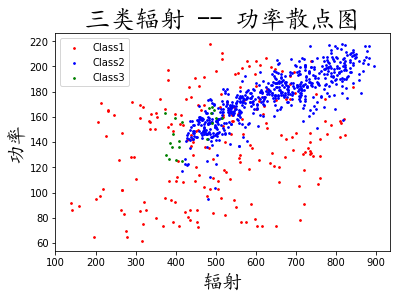

In [9]:
import matplotlib.pyplot as plt
Class_one = []
Class_two = []
Class_three = []
for row in Ever_day:
    if row[-1] == -1:
        Class_one.append([row[4],row[-2]])
    elif row[-1] == 0:
        Class_two.append([row[4],row[-2]])
    else:
        Class_three.append([row[4],row[-2]])
Class_one = np.array(Class_one)
Class_two = np.array(Class_two)
Class_three = np.array(Class_three)
plt.scatter(Class_one[:,0],Class_one[:,1],s = 3,c = 'r',label = 'Class1')
plt.scatter(Class_two[:,0],Class_two[:,1],s = 3,c = 'b',label = 'Class2')
if len(Class_three) > 0:
    plt.scatter(Class_three[:,0],Class_three[:,1],s = 3,c = 'g',label = 'Class3')
plt.xlabel('辐射',fontproperties = 'Kaiti',fontsize = 20)
plt.ylabel('功率',fontproperties = 'Kaiti',fontsize = 20)
plt.title('三类辐射 -- 功率散点图',fontproperties = 'Kaiti',fontsize = 25)
plt.legend()
plt.show()